In [128]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import datasets, layers, models

In [129]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [130]:
X_test.shape

(10000, 32, 32, 3)

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
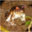

In [131]:
X_train[0]

In [132]:
y_train.shape
y_test = y_test.reshape(-1,)

In [133]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [134]:
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [135]:
def plot_sample(X, y, index):
    plt.figure(figsize=(15, 2))
    plt.imshow(X_train[index])
    plt.xlabel(classes[y[index]])

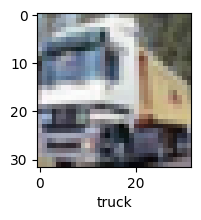

In [138]:
plot_sample(X_train, y_train, 1)

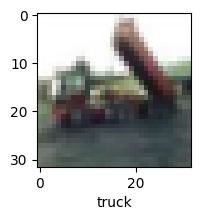

In [139]:
plot_sample(X_train, y_train, 2)

In [140]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1515/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 88ms/step - accuracy: 0.3042 - loss: 1.9380

In [101]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      1000
           1       0.00      0.00      0.00      1000
           2       0.00      0.00      0.00      1000
           3       0.00      0.00      0.00      1000
           4       0.00      0.00      0.00      1000
           5       0.00      0.00      0.00      1000
           6       0.10      1.00      0.18      1000
           7       0.00      0.00      0.00      1000
           8       0.00      0.00      0.00      1000
           9       0.00      0.00      0.00      1000

    accuracy                           0.10     10000
   macro avg       0.01      0.10      0.02     10000
weighted avg       0.01      0.10      0.02     10000



In [122]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


cnn.fit(X_train, y_train, epochs=1)

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 60s 37ms/step - accuracy: 0.0967 - loss: 2.3028


In [123]:
cnn.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.0987 - loss: 2.3026


[2.3026182651519775, 0.10000000149011612]

In [124]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step


array([[0.10000604, 0.1003852 , 0.09911308, 0.09866004, 0.10137594,
        0.10036223, 0.10001124, 0.09892559, 0.10089974, 0.10026091],
       [0.10000604, 0.1003852 , 0.09911308, 0.09866004, 0.10137594,
        0.10036223, 0.10001124, 0.09892559, 0.10089974, 0.10026091],
       [0.10000604, 0.1003852 , 0.09911308, 0.09866004, 0.10137594,
        0.10036223, 0.10001124, 0.09892559, 0.10089974, 0.10026091],
       [0.10000604, 0.1003852 , 0.09911308, 0.09866004, 0.10137594,
        0.10036223, 0.10001124, 0.09892559, 0.10089974, 0.10026091],
       [0.10000604, 0.1003852 , 0.09911308, 0.09866004, 0.10137594,
        0.10036223, 0.10001124, 0.09892559, 0.10089974, 0.10026091]],
      dtype=float32)

In [125]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[4, 4, 4, 4, 4]

In [126]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

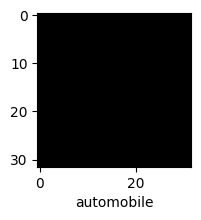

In [127]:
plot_sample(X_test, y_test,6)

In [111]:
classes[y_classes[6]]

'ship'